### 1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268




In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from keras.losses import binary_crossentropy

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_recall_curve,precision_score,classification_report

In [102]:
df=pd.read_csv('pima_diabates.txt',usecols=['Plasma glucose concentration','Body mass index (weight in kg/(height in m)^2)','target'])

In [103]:
df

,Plasma glucose concentration,Body mass index (weight in kg/(height in m)^2),target
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1
...,...,...,...
763,101,32.9,0
764,122,36.8,0
765,121,26.2,0
766,126,30.1,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Plasma glucose concentration                    768 non-null    int64  
 1   Body mass index (weight in kg/(height in m)^2)  768 non-null    float64
 2   target                                          768 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 18.1 KB


In [105]:
df.describe()

,Plasma glucose concentration,Body mass index (weight in kg/(height in m)^2),target
count,768.000000,768.000000,768.000000
mean,120.894531,31.992578,0.348958
std,31.972618,7.884160,0.476951
min,0.000000,0.000000,0.000000
25%,99.000000,27.300000,0.000000
50%,117.000000,32.000000,0.000000
75%,140.250000,36.600000,1.000000
max,199.000000,67.100000,1.000000


### Data Preprocessing and Filter

In [106]:
df.isnull().sum()

Plasma glucose concentration                      0
Body mass index (weight in kg/(height in m)^2)    0
target                                            0
dtype: int64

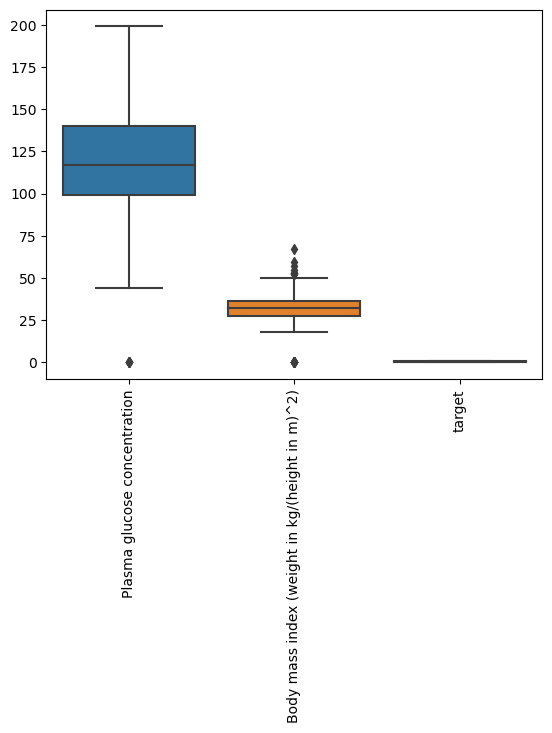

In [107]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [108]:
df.columns

Index(['Plasma glucose concentration',
       'Body mass index (weight in kg/(height in m)^2)', 'target'],
      dtype='object')

In [109]:
# df1=df.loc[~((df['Diastolic blood pressure (mm Hg)']<39) | (df['Diastolic blood pressure (mm Hg)']>106) |  (df['Body mass index (weight in kg/(height in m)^2)'] < 10) | (df['Body mass index (weight in kg/(height in m)^2)'] > 55))]
df1=df.loc[~((df['Body mass index (weight in kg/(height in m)^2)'] < 10) | (df['Body mass index (weight in kg/(height in m)^2)'] > 55) |(df['Plasma glucose concentration']<25))]

### After Removing 19 data points

In [110]:
df1.reset_index(drop=True,inplace=True)

In [12]:
df1['x1']=df1['Plasma glucose concentration']**2
df1['x2']=df1['Body mass index (weight in kg/(height in m)^2)']**2
df1['x1x2']=df1['Plasma glucose concentration']*df1['Body mass index (weight in kg/(height in m)^2)']


/tmp/ipykernel_4748/994757463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x1']=df1['Plasma glucose concentration']**2
/tmp/ipykernel_4748/994757463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['x2']=df1['Body mass index (weight in kg/(height in m)^2)']**2
/tmp/ipykernel_4748/994757463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [13]:
df1['Target']=df1.target.values

/tmp/ipykernel_4748/376172470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Target']=df1.target.values


In [14]:
df1.drop('target',axis=1,inplace=True)

/tmp/ipykernel_4748/1525545335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('target',axis=1,inplace=True)


In [15]:
X=df1.drop('Target',axis=1)
y=df1.Target

In [16]:
scale=StandardScaler()
X=scale.fit_transform(X)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Drop

In [18]:
model=LogisticRegression(multi_class='multinomial')
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [20]:
confusion_matrix(y_test,y_pred)

array([[80, 15],
       [21, 34]])

In [21]:
f1_score(y_test,y_pred)

0.6538461538461539

Text(50.722222222222214, 0.5, 'predicted')

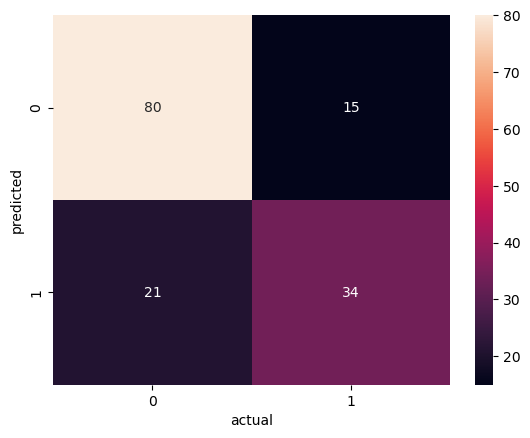

In [22]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('actual')
plt.ylabel('predicted')

In [23]:
recall_score(y_test,y_pred)

0.6181818181818182

In [24]:
precision_score(y_test,y_pred)

0.6938775510204082

In [25]:
# Generate the classification report
report = classification_report(y_test, y_pred)

In [26]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        95
           1       0.69      0.62      0.65        55

    accuracy                           0.76       150
   macro avg       0.74      0.73      0.74       150
weighted avg       0.76      0.76      0.76       150



In [27]:
# Print the coefficients (parameter values) and intercept term
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.64788772  0.63759148 -0.08079274 -0.32974541  0.03054104]]
Intercept: [-0.41271942]


## straight line

In [28]:
c=model.intercept_
m1=model.coef_[0,0]
m2=model.coef_[0,1]
m3=model.coef_[0,2]
m4=model.coef_[0,3]
m5=model.coef_[0,4]

In [29]:
df_new=pd.DataFrame(X_test)

In [30]:
x1=df_new[0]
x2=df_new[1]
x3=df_new[2]
x4=df_new[3]
x5=df_new[4]



In [31]:
# m1x1+m2x2+m3x3+m4x4+m5x5+c=0
z=m1*x1+m2*x2+m3*x3+m4*x4+m5*x5+c

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


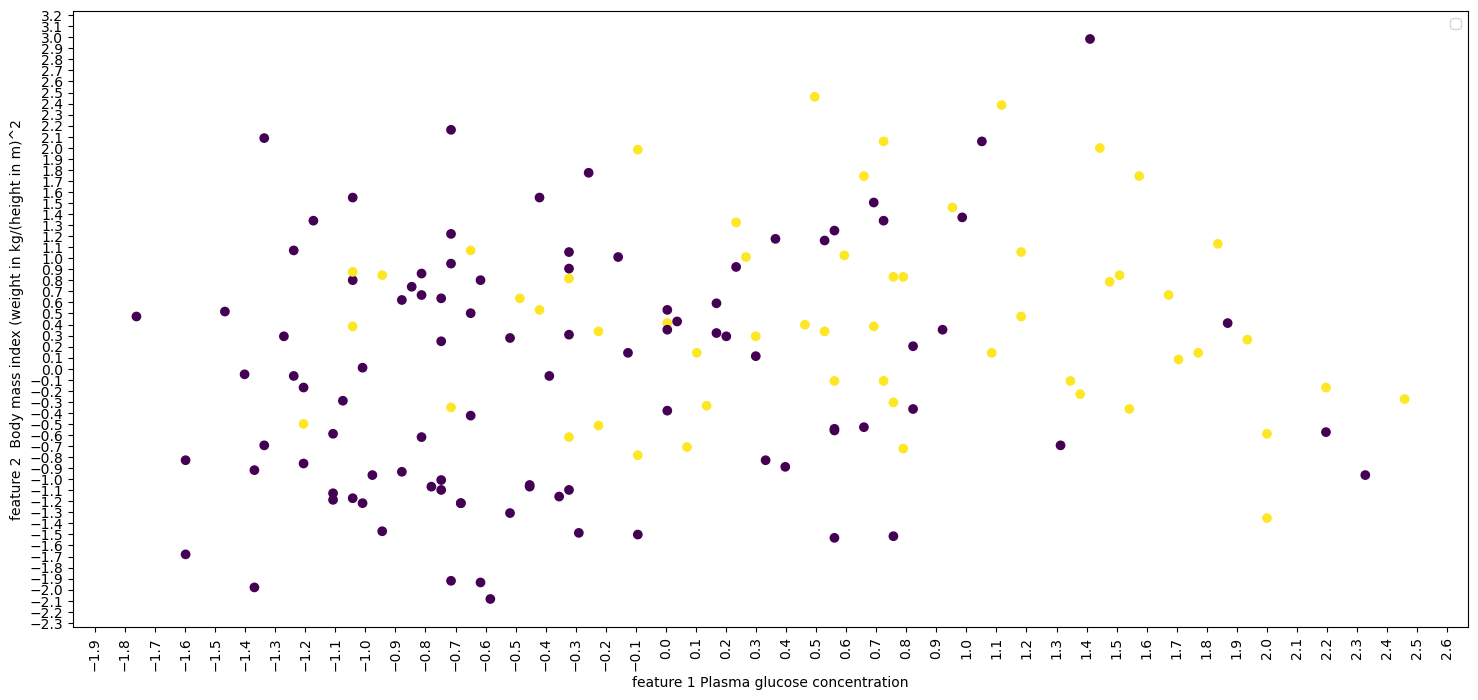

In [32]:
plt.figure(figsize=(18,8))
plt.xticks(np.arange(-3,3,0.1),rotation=90)
plt.yticks(np.arange(-3,4,0.1))

# plt.scatter(x1,x2,c=y)
# plt.grid(True)
# class_labels = [0,1]  # Replace with your class labels
plt.scatter(x1, x2, c=y_test)
plt.xlabel('feature 1 Plasma glucose concentration')
plt.ylabel('feature 2  Body mass index (weight in kg/(height in m)^2')
# [X1, X2] = np.meshgrid(x1, x2)
plt.legend()
plt.show()
# fig, ax = plt.subplots(1, 1)
  
# Z =m1*X1+m2*X2+m3*X1**2+m4*X2**2+m5*X1*X2+c 
# plots contour lines
# ax.contour(X1, X2, Z)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


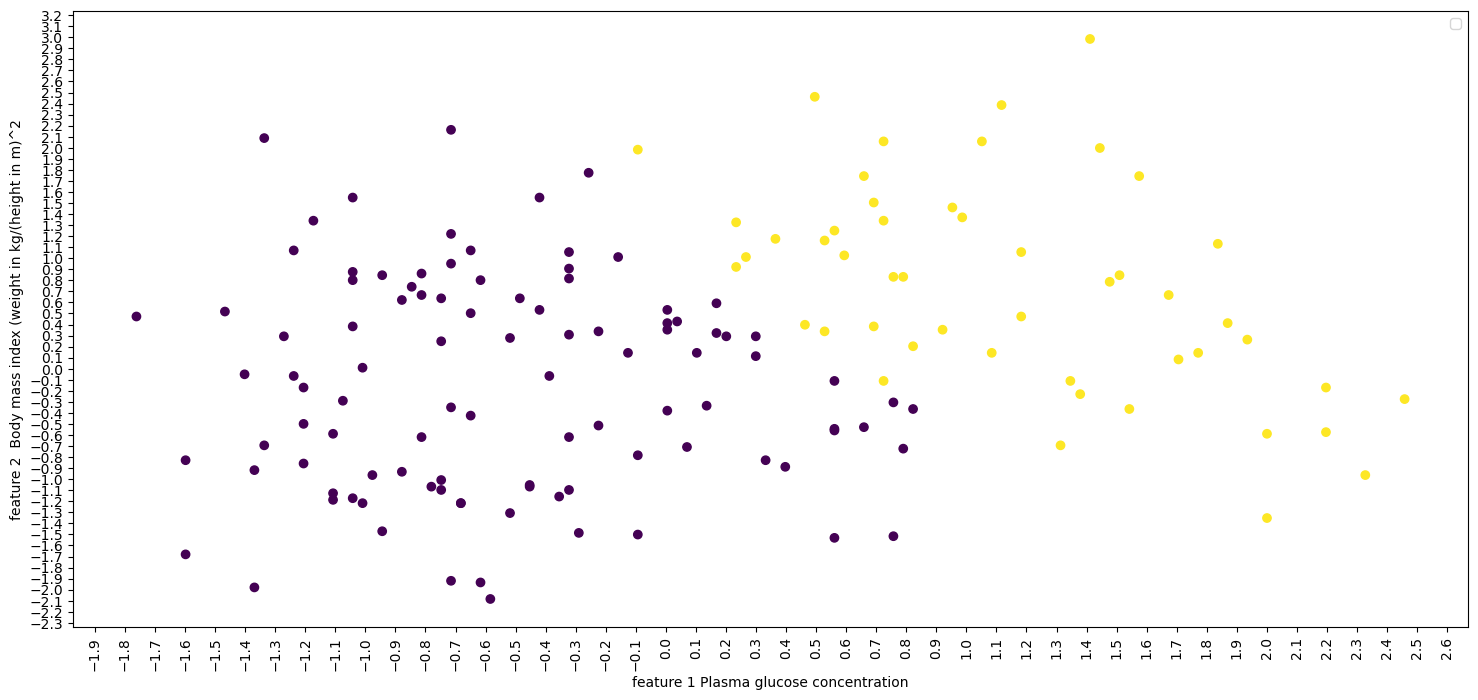

In [33]:
plt.figure(figsize=(18,8))
plt.xticks(np.arange(-3,3,0.1),rotation=90)
plt.yticks(np.arange(-3,4,0.1))

# plt.scatter(x1,x2,c=y)
# plt.grid(True)
# class_labels = [0,1]  # Replace with your class labels
plt.scatter(x1, x2, c=y_pred)
plt.xlabel('feature 1 Plasma glucose concentration')
plt.ylabel('feature 2  Body mass index (weight in kg/(height in m)^2')
# [X1, X2] = np.meshgrid(x1, x2)
plt.legend()
plt.show()
# fig, ax = plt.subplots(1, 1)
  
# Z =m1*X1+m2*X2+m3*X1**2+m4*X2**2+m5*X1*X2+c 
# plots contour lines
# ax.contour(X1, X2, Z)

In [34]:
[X1_mesh, X2_mesh] = np.meshgrid(x1, x2)

In [35]:
X1_ravel=X1_mesh.ravel()
X2_ravel=X2_mesh.ravel()
df_test_ravel=pd.DataFrame()
df_test_ravel['x1']=X1_ravel
df_test_ravel['x2']=X2_ravel
df_test_ravel['x1*2']=X1_ravel**2
df_test_ravel['x2*2']=X2_ravel**2
df_test_ravel['x1x2']=X1_ravel*X2_ravel
# y_pred = model.predict(X_test)

In [36]:
y_pred_mesh = model.predict(df_test_ravel)

/home/shahid/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


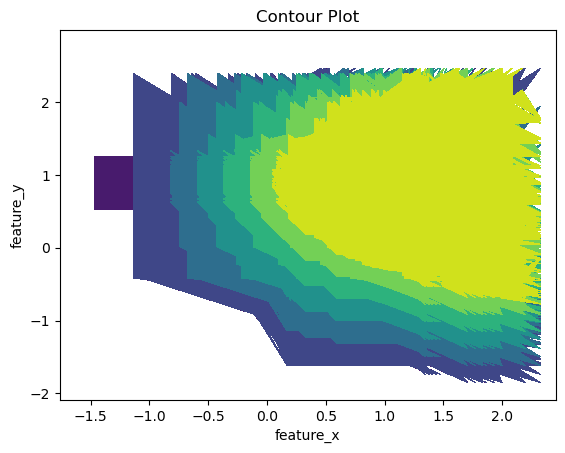

In [37]:
# [X1, X2] = np.meshgrid(X1, X2)
  
fig, ax = plt.subplots(1, 1)
  
# Z =m1*X1+m2*X2+m3*X1**2+m4*X2**2+m5*X1*X2+c 
# plots contour lines
X1_matrix=X1_ravel.reshape(150,150)
X2_matrix=X2_ravel.reshape(150,150)
y_pred_matrix=y_pred_mesh.reshape(150,150)
ax.contourf(X1_matrix, X2_matrix, y_pred_matrix)
  
ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
  
plt.show()

### colar bar

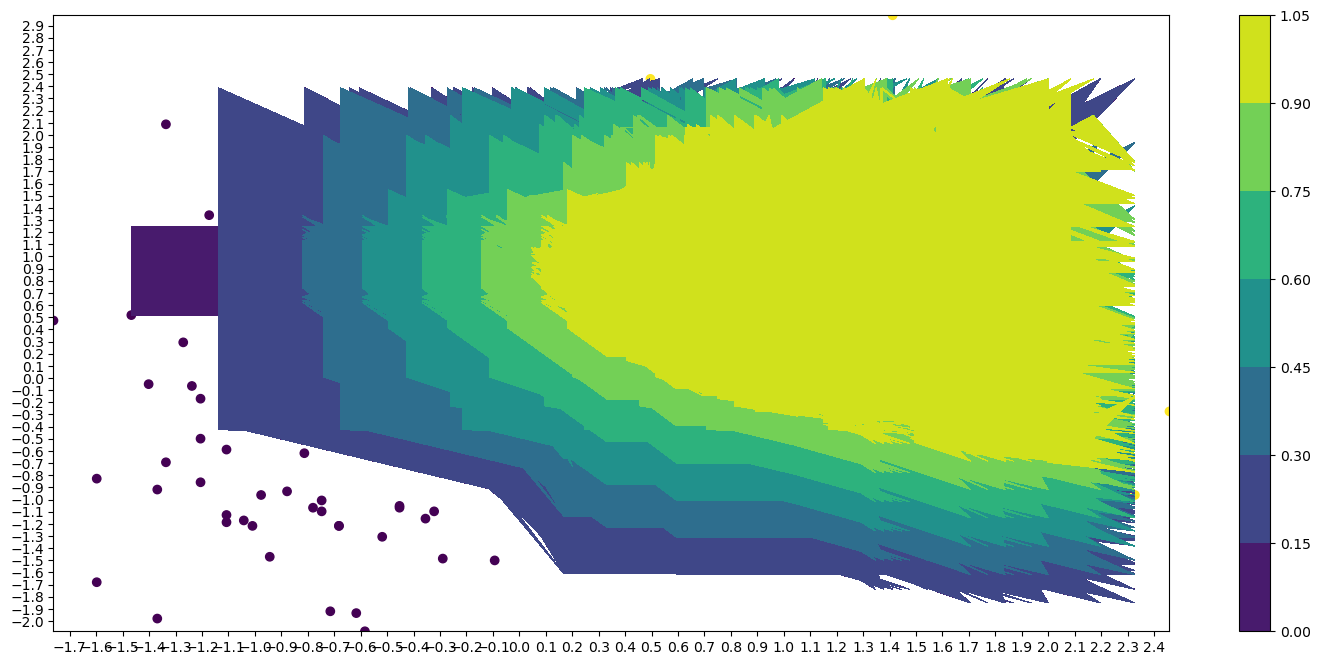

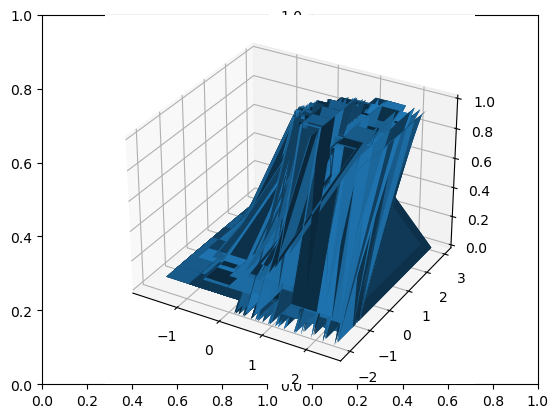

In [38]:
plt.figure(figsize=(18,8))
plt.xticks(np.arange(-3,3,0.1))
plt.yticks(np.arange(-3,4,0.1))
plt.scatter(x1,x2,c=y_pred)
# fig, ax = plt.subplots(1, 1)
  
# Z =m1*X1+m2*X2+m3*X1**2+m4*X2**2+m5*X1*X2+c 
# plots contour lines
# plt.contourf(X1, X2, y_pred)

plt.contourf(X1_matrix, X2_matrix, y_pred_matrix)
plt.colorbar()
  
# ax.set_title('Contour Plot')
# ax.set_xlabel('feature_x')
# ax.set_ylabel('feature_y')



fig,bx = plt.subplots(1,2)
bx = plt.axes(projection ='3d')
bx.plot_surface(X1_matrix, X2_matrix, y_pred_matrix)
  
plt.show()
  


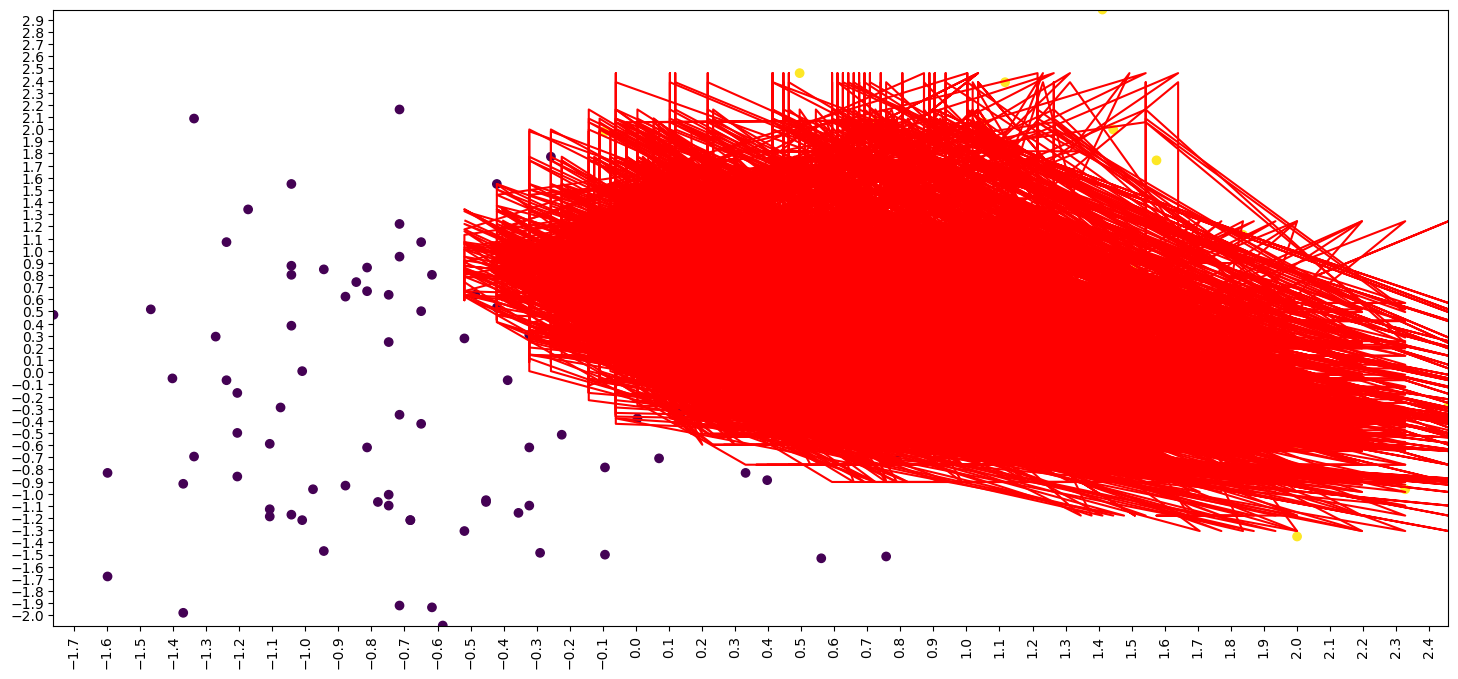

In [39]:
plt.figure(figsize=(18, 8))
plt.xticks(np.arange(-3, 3, 0.1),rotation=90)
plt.yticks(np.arange(-3, 4, 0.1))
plt.scatter(x1, x2, c=y_pred)


# Assuming you have defined X1, X2, and y_pred

plt.contour(X1_matrix, X2_matrix, y_pred_matrix, levels=[0.5], colors='red')
# plt.colorbar()

plt.show()


In [40]:
# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

In [41]:
poly_df=pd.DataFrame(X_test)

In [42]:
# Get the features 
X_mapf= poly_df.iloc[:, :2]

In [43]:
degree = 1

In [44]:
X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)

In [45]:
# Get the target variable
y_poly = y_test

In [46]:
# componenet =X_test
# 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [47]:
def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 

In [48]:
# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

In [49]:
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y_poly))

/tmp/ipykernel_4748/542430753.py:2: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(costFunc, initial_theta, args=(X_poly, y_poly))


In [50]:
# our optimizated coefficients
theta = res.x

In [51]:
theta

array([-0.34338794,  1.18184934,  0.71664918, -0.11700305,  0.14125155,
       -0.47513575])

In [52]:
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1.5, 3, 50)
    v = np.linspace(-1.5, 3, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['diabetic','normal',  'Decision Boundary'])
    return cs

In [64]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [65]:
poly_df_with_y=poly_df
poly_df_with_y['target']=y_test.values

In [66]:
pos=poly_df_with_y['target']==1
neg=poly_df_with_y['target']==0

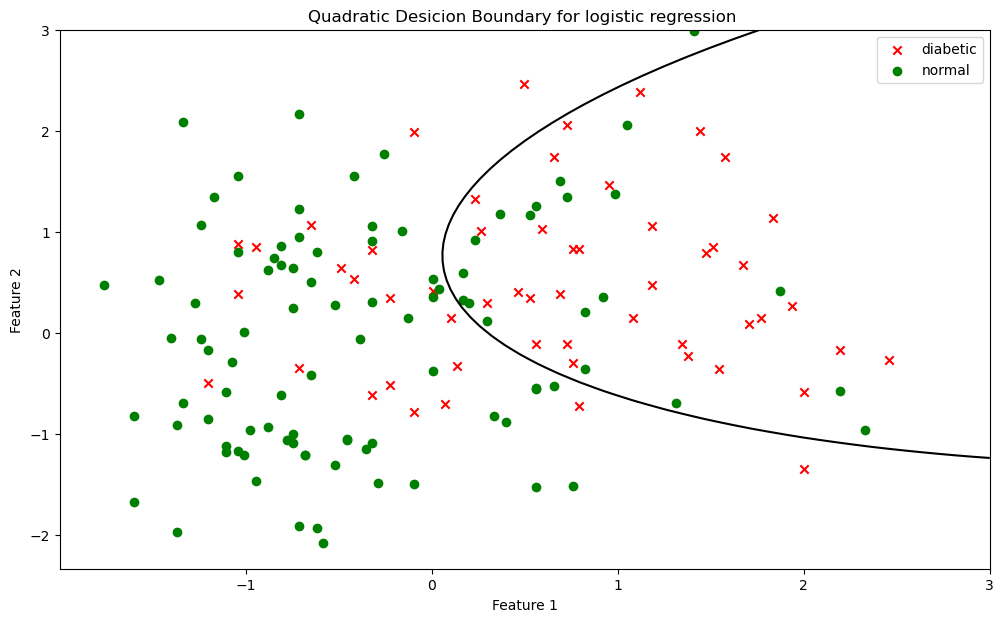

In [69]:
# Plot Decision boundary
fig, axes = plt.subplots(figsize=(12,7));
# axes.figure(figsize=(12,7))
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='diabetic')
axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='normal')
axes.legend(title='Legend', loc = 'best' )
axes.set_title('Quadratic Desicion Boundary for logistic regression ')

plotDecisionBoundary(theta, degree, axes)

### For cubic equation

In [71]:
# set degree = 3
degree = 3
# map features to the degree
X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)
# set initial parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

/tmp/ipykernel_4748/575786741.py:2: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(costFunc, initial_theta, args=(X_poly, y_test))


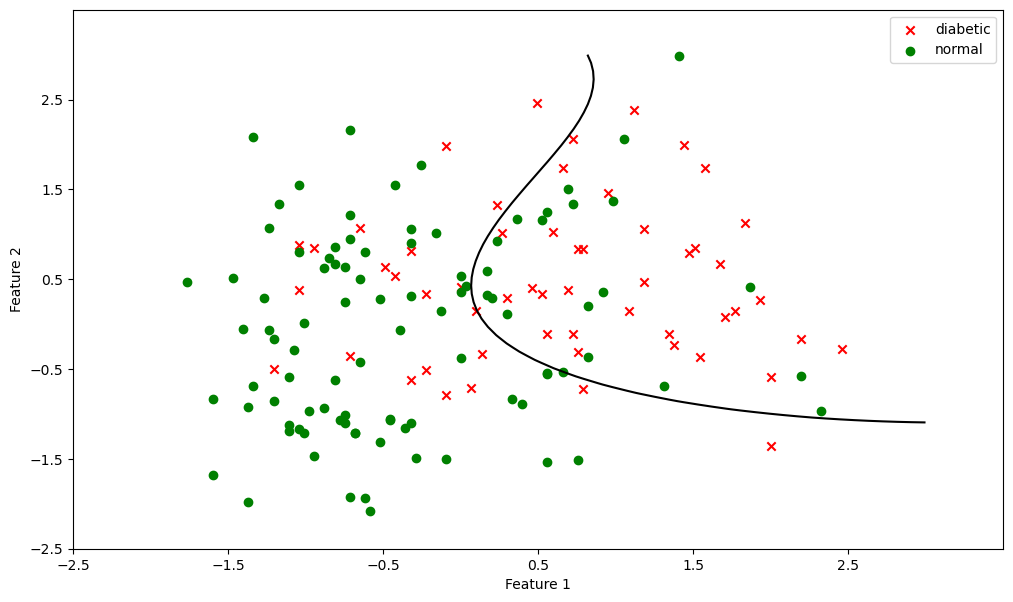

In [86]:
# Run the optimzation function
res = minimize(costFunc, initial_theta, args=(X_poly, y_test))
theta = res.x.reshape(res.x.shape[0], 1)

# Plot Decision boundary
fig, axes = plt.subplots(figsize=(12,7));
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.set_xticks(np.arange(-3.5,3))
axes.set_yticks(np.arange(-3.5,3))
axes.set_ylim([-2.5,3.5])
axes.set_xlim([-2.5,3.5])
axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='Faulty')
axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='Good')

#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta, degree, axes)

In [99]:
# set degree = 3
degree = 1
# map features to the degree
X_poly = mapFeature(X_mapf.iloc[:, 0], X_mapf.iloc[:, 1], degree)
# set initial parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

/tmp/ipykernel_4748/575786741.py:2: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  res = minimize(costFunc, initial_theta, args=(X_poly, y_test))


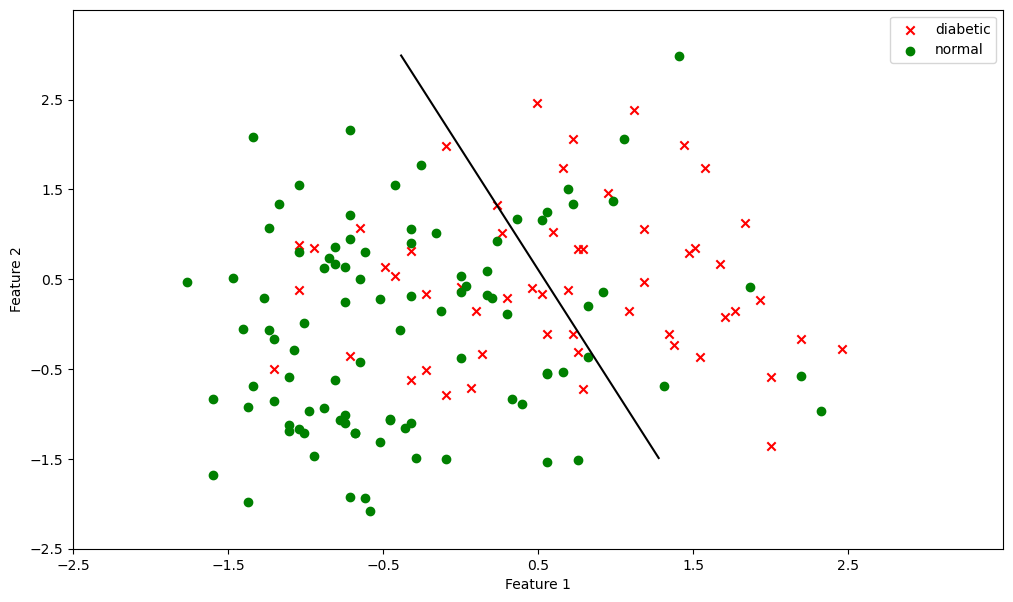

In [100]:
# Run the optimzation function
res = minimize(costFunc, initial_theta, args=(X_poly, y_test))
theta = res.x.reshape(res.x.shape[0], 1)

# Plot Decision boundary
fig, axes = plt.subplots(figsize=(12,7));
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.set_xticks(np.arange(-3.5,3))
axes.set_yticks(np.arange(-3.5,3))
axes.set_ylim([-2.5,3.5])
axes.set_xlim([-2.5,3.5])
axes.scatter(poly_df.loc[pos, 0], poly_df.loc[pos, 1], color = 'r', marker='x', label='Faulty')
axes.scatter(poly_df.loc[neg, 0], poly_df.loc[neg, 1], color = 'g', marker='o', label='Good')

#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta, degree, axes)

### function values

In [56]:

f =m1*X1_ravel+m2*X2_ravel+m3*X1_ravel**2+m4*X2_ravel**2+m5*X1_ravel*X2_ravel+c 

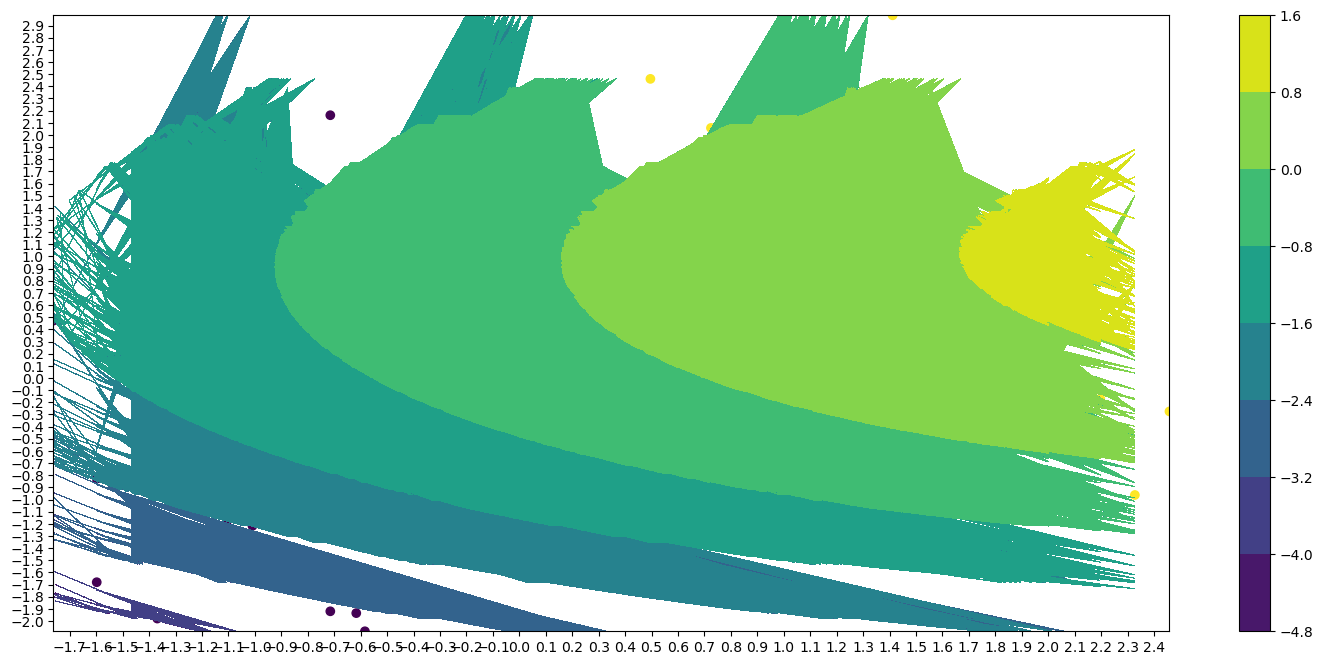

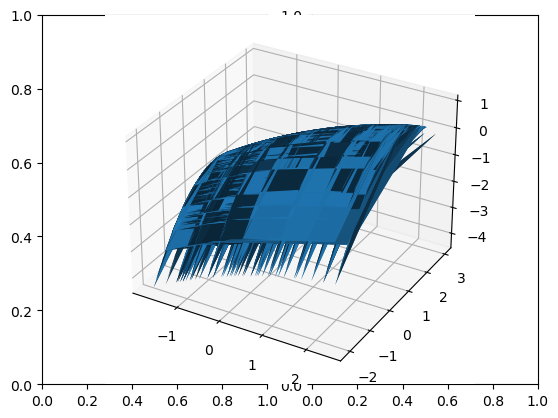

In [57]:
plt.figure(figsize=(18,8))
plt.xticks(np.arange(-3,3,0.1))
plt.yticks(np.arange(-3,4,0.1))
plt.scatter(x1,x2,c=y_pred)

# fig, ax = plt.subplots(1, 1)
  
# Z =m1*X1+m2*X2+m3*X1**2+m4*X2**2+m5*X1*X2+c 
# plots contour lines
plt.contourf(X1_matrix, X2_matrix, f.reshape(150,150))
# plt.axes(projection ='3d').plot_surface(X1.reshape(749,749), X2.reshape(749,749), y_pred.reshape(749,749))
plt.colorbar()



fig,bx = plt.subplots(1,2)
bx = plt.axes(projection ='3d')
bx.plot_surface(X1_matrix, X2_matrix, f.reshape(150,150))

plt.show()